# Movie Data Analysis

![](images/studio.jpg)

# BUSINESS UNDERSTADING

**Microsoft needs data to create a new most benifical movie studio because microsoft want to enter in new industries.** 


# DATA UNDERSTANDING

**They provide us some csv and tsv file and IMDB table for analysis and give them authentic data with visulisation. For analysis using some compution library and standard visulisation library.**


# Data Prepartion

**we are going to analysis 1)Top studio on box office using by rt_movie_info.tsv file. 2)Top ten profit making movie 
in domestic as well as worldwide using by tn.movie_budgets.csv file.  3)Most revenue earning studio domestic and foreign using bom.movie_gross.csv file.  4) Averagerating by genres using two table movie_basics & movie_rating from IMDB.  5)top directors as per averagerating using three table Persin, director and movie_rating from IMDB**


In [1]:
#import some library 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [3]:
#unzips the SQL data, since SQLite doesn't work with zipped data
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [4]:
!ls zippedData

bom.movie_gross.csv.gz	rt.movie_info.tsv.gz  tmdb.movies.csv.gz
im.db.zip		rt.reviews.tsv.gz     tn.movie_budgets.csv.gz


# Data Manipulation and Analysis

In [5]:
#for above data read the rt.movie.info cvs file

In [6]:
rt_movie_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
#some datatype need to change from string to float e.g box_office dtat should be change to float.

In [8]:
rt_movie_info['box_office'] = rt_movie_info['box_office'].str.replace(',', '').astype(float)

In [9]:
rt_movie_info['box_office'] = rt_movie_info['box_office'].fillna(0)
rt_movie_info = rt_movie_info.sort_values(by="box_office", ascending=False)
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
827,1071,This depiction of the last 12 hours in the lif...,R,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,"Feb 25, 2004","Aug 31, 2004",$,368000000.0,127 minutes,Newmarket Film Group
877,1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,"Dec 14, 2012","Mar 19, 2013",$,303001229.0,170 minutes,Warner Bros.
1188,1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,"Nov 9, 2012","Mar 11, 2013",$,299300000.0,145 minutes,MGM
690,883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,"Dec 22, 2004","Apr 26, 2005",$,279167575.0,118 minutes,Universal Pictures
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,261835892.0,161 minutes,Warner Bros. Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
574,744,On a flight home to Chicago for a family weddi...,PG-13,Comedy|Romance,John Burgess,Dode Levenson,"Feb 6, 2015","Feb 9, 2015",NaN,0.0,100 minutes,Freestyle Releasing
573,743,NaN,NR,Drama,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
572,742,An off-beat love story provides the framework ...,R,Art House and International|Comedy|Drama|Romance,Richard Spence,Tony Merchant,"Sep 12, 1997","Feb 13, 2001",NaN,0.0,92 minutes,NaN
571,741,The fourth (and final,R,Action and Adventure|Mystery and Suspense,Cedric Sundstrom,James Booth|David Geeves,"Mar 8, 1991","Dec 6, 2005",NaN,0.0,99 minutes,NaN


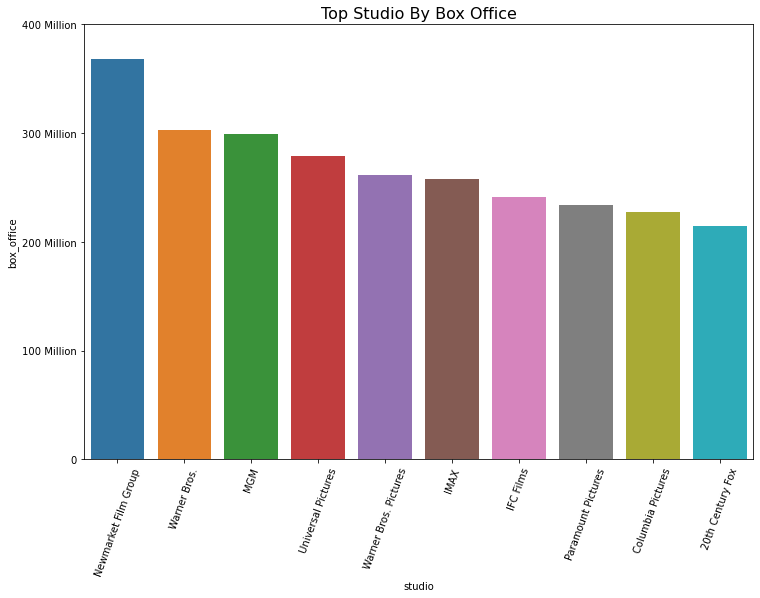

In [10]:
# data visulisation by seaboan barplot
plt.figure(figsize = (12,8))
ax = sns.barplot(x='studio',y='box_office',data=rt_movie_info.head(10))
ax.set_title('Top Studio By Box Office',size=16)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)
plt.yticks(ticks=[0,1e8,2e8,3e8,4e8], labels=['0','100 Million','200 Million','300 Million','400 Million']);

In [11]:
# read tn.movie.budgets csv file for table info

In [12]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
# Data cleaning need to change datatype from sting to float for production_budget, domestic_gross and worldwide_gross
movie_budgets.production_budget = movie_budgets.production_budget.apply(lambda x: x.strip('$').replace(',','')).astype(float)
movie_budgets.domestic_gross = movie_budgets.domestic_gross.apply(lambda x: x.strip('$').replace(',','')).astype(float)
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.apply(lambda x: x.strip('$').replace(',','')).astype(float)

In [14]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [15]:
# worldwide_gross numbers are now expressed in scientific notetion like e+09

In [16]:
# find out domestic and worldwide profit from budget.
movie_budgets['profit_domestic'] = (movie_budgets['domestic_gross'] - movie_budgets['production_budget']) /1000000
movie_budgets['profit_worldwide'] = (movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) /1000000
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_domestic,profit_worldwide
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335.507625,2351.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169.536125,635.063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307.237650,-200.237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128.405868,1072.413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303.181382,999.721747


In [17]:
# Top ten domestic profit making movies
top_ten_dom = dict(movie_budgets[['movie','profit_domestic']].sort_values(by = 'profit_domestic',ascending=False)[:10].values)
top_ten_dom

{'Star Wars Ep. VII: The Force Awakens': 630.662225,
 'Black Panther': 500.059566,
 'Titanic': 459.363944,
 'Star Wars Ep. IV: A New Hope': 449.998007,
 'Jurassic World': 437.270625,
 'ET: The Extra-Terrestrial': 424.610554,
 'Incredibles 2': 408.581744,
 'The Avengers': 398.279547,
 'Avengers: Infinity War': 378.815482,
 'Shrek 2': 371.226247}

In [18]:
# top ten worldwide profit making movies
top_ten_ww = dict(movie_budgets[['movie','profit_worldwide']].sort_values(by = 'profit_worldwide',ascending=False)[:10].values)
top_ten_ww

{'Avatar': 2351.345279,
 'Titanic': 2008.208395,
 'Avengers: Infinity War': 1748.1342,
 'Star Wars Ep. VII: The Force Awakens': 1747.31122,
 'Jurassic World': 1433.854864,
 'Furious 7': 1328.722794,
 'The Avengers': 1292.935897,
 'Harry Potter and the Deathly Hallows: Part II': 1216.693157,
 'Black Panther': 1148.258224,
 'Jurassic World: Fallen Kingdom': 1135.772799}

In [19]:
#define the value and key for visulisation
movie_name = list(top_ten_dom.keys())
profit_domestic = list(top_ten_dom.values())
movie_name_ww = list(top_ten_ww.keys())
profit_worldwide = list(top_ten_ww.values())

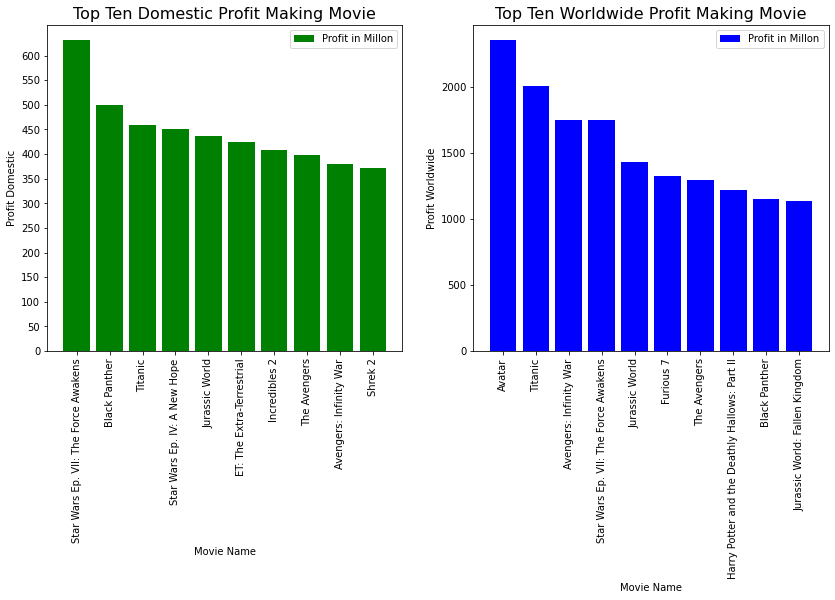

In [20]:
ncols=2
fig, ax = plt.subplots(figsize=(14,6), ncols=2)

# Top ten domestic profit making movies
ax[0].bar(x=movie_name, height=profit_domestic, color='green')
ax[0].set_title('Top Ten Domestic Profit Making Movie',size=16)
ax[0].set_xlabel('Movie Name')
ax[0].set_ylabel('Profit Domestic')
ax[0].set_yticks(range(0,650,50))
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].legend(["Profit in Millon"], loc=1);

 #top ten worldwide profit making movie
ax[1].bar(x=movie_name_ww, height=profit_worldwide, color='blue')
ax[1].set_title('Top Ten Worldwide Profit Making Movie',size=16)
ax[1].set_xlabel('Movie Name')
ax[1].set_ylabel('Profit Worldwide')
#ax[1].set_yticks(range(0,650,50))
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].legend(["Profit in Millon"], loc=1);

**Most revenue earning studio (domestic gross and foreign gross)**

In [21]:
# read bom_movie_gross cvs file and check the datatype

In [22]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
# as you see above foreign_gross is showing data in string
# Data cleaning change foreign_gross is string change to float 
bom_movie_gross.foreign_gross = bom_movie_gross.foreign_gross.str.replace(',','').astype(float)

In [24]:
# change value from NAN to 0
bom_movie_gross.foreign_gross = bom_movie_gross.foreign_gross.fillna(0)
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [25]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


In [26]:
# extract the 3 column and sort
df_studio = bom_movie_gross[['studio','domestic_gross','foreign_gross']]
df_studio = df_studio.groupby('studio').mean()
df_studio = df_studio.sort_values(by=('domestic_gross'),ascending=False)
df_studio = df_studio.sort_values(by=('foreign_gross'),ascending=False)
df_studio

,domestic_gross,foreign_gross
studio,,
HC,2.700000e+06,8.676000e+08
P/DW,1.682900e+08,3.393600e+08
BV,1.737644e+08,2.433383e+08
GrtIndia,2.020000e+07,2.340000e+08
Fox,8.051103e+07,1.474696e+08
...,...,...
ELS,2.300000e+06,0.000000e+00
SM,1.570000e+05,0.000000e+00
BM&DH,1.660000e+05,0.000000e+00


In [27]:
df_studio = df_studio.head(20)

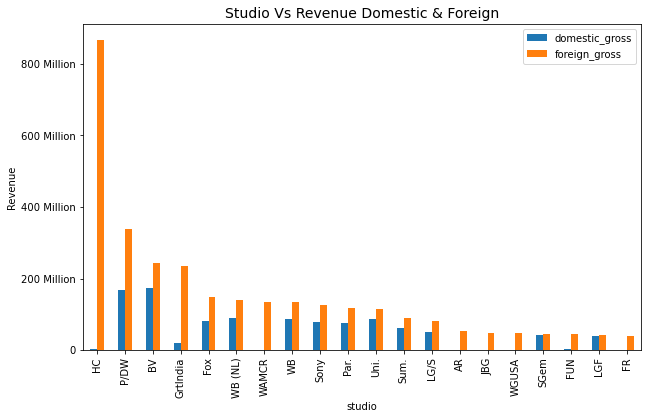

In [28]:
# data visulisation in barplot with revenue of domestic and foreign gross value in million
df_studio.plot(kind='bar', figsize = (10,6))
plt.title('Studio Vs Revenue Domestic & Foreign', size=14)
plt.ylabel('Revenue')
plt.yticks(ticks=[0,2e8,4e8,6e8,8e8], labels=['0','200 Million','400 Million','600 Million','800 Million']);

**Averagerating by genres**


In [29]:
# create the connection by sql
conn = sqlite3.connect("im.db")

In [30]:
# find out averagerating by genres
#join table movie_basic and movie_rating
df = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)

""", conn)

df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [31]:
# make a new cloumn 'genres_lst and split the string 
df['genres_lst'] = df['genres'].str.split(",")
df_rating = df.explode('genres_lst')

In [32]:
top_rating = df_rating.sort_values(by='averagerating',ascending=False)


In [33]:
# data groupby genres_lst and sort values of averagerating in ascending order 
top_rating_genres = top_rating.groupby('genres_lst').mean()['averagerating'].sort_values(ascending=False)
top_rating_genres

genres_lst
Short          8.800000
Documentary    7.332090
Game-Show      7.300000
News           7.271330
Biography      7.162274
Music          7.091972
History        7.040956
Sport          6.961493
War            6.584291
Reality-TV     6.500000
Musical        6.498336
Drama          6.401559
Family         6.394725
Animation      6.248308
Adventure      6.196201
Romance        6.146608
Crime          6.115441
Comedy         6.002689
Mystery        5.920401
Fantasy        5.919473
Western        5.868214
Action         5.810361
Thriller       5.639114
Sci-Fi         5.489755
Horror         5.003440
Adult          3.766667
Name: averagerating, dtype: float64

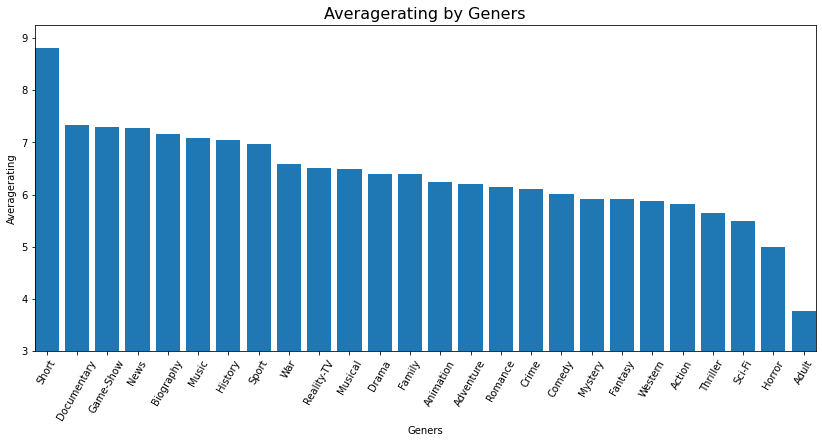

In [34]:
fig, ax = plt.subplots(figsize=(14,6))

ax.bar(x=top_rating_genres.index, height=top_rating_genres)

# Add title and labels
ax.set_title('Averagerating by Geners', size=16)
ax.set_xlabel('Geners')
ax.set_ylabel('Averagerating')
ax.tick_params(axis='x', labelrotation = 60)
plt.ylim(3,9.25)
ax.margins(x=0);

**data analyse with most top directors as per averagerating**

In [35]:
#join table directors and movie_rating
df_director = pd.read_sql("""
SELECT movie_id,primary_name,averagerating
FROM persons
JOIN directors
    USING(person_id)
JOIN movie_ratings
    USING(movie_id)

ORDER BY averagerating DESC;

""", conn)

df_director

,movie_id,primary_name,averagerating
0,tt10176328,Ivana Diniz,10.0
1,tt10176328,Ivana Diniz,10.0
2,tt2632430,Mohamed Ulad-Mohand,10.0
3,tt7227500,Robert Tutak,10.0
4,tt6991826,Cristina Duarte,10.0
...,...,...,...
181382,tt6018006,Andrey Gromov,1.0
181383,tt6018006,Andrey Gromov,1.0
181384,tt6207700,Andrey Gromov,1.0
181385,tt6207700,Andrey Gromov,1.0


In [36]:
# groupby director and sort value ascending
director_rate=df_director.groupby('primary_name').median()['averagerating'].sort_values(ascending=False).head(15)
director_rate

primary_name
Stephen Peek              10.0
Tristan David Luciotti    10.0
Lindsay Thompson          10.0
Loreto Di Cesare          10.0
Chad Carpenter            10.0
Michiel Brongers          10.0
Masahiro Hayakawa         10.0
Ivana Diniz               10.0
Emre Oran                 10.0
Andrew Jezard              9.9
Kalyan Varma               9.9
Raphael Sbarge             9.9
Amoghavarsha               9.9
Nagaraja Uppunda           9.9
Bonnie Hawthorne           9.8
Name: averagerating, dtype: float64

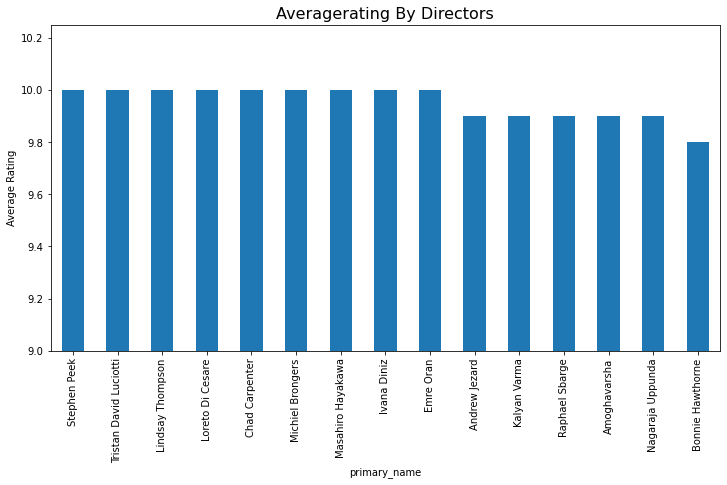

In [37]:
director_rate.plot(kind="bar", figsize=(12,6));
plt.title('Averagerating By Directors', size=16)
plt.ylabel('Average Rating')
plt.ylim(9,10.25);

**Based on the data results I would suggest Microsoft to invest in Top most genres like HC, Documentary  
movies with any top ten directors because they would bring the most amount of profit to the microsoft. 
Also i suggest to invest in top profitable movie like Avtar, Titanic, Star Wars Ep.VII: The Force Awakens, 
Black panther.**

In [38]:
conn.close()